# Heart Stroke Classification 

Apply  the data classification algorithms on the heart dataset.The heart stroke dataset has information about thepatient medical situation, weight, smoking behavior and othermedical information related to thecauses of heart stroke.Such data can be used to give us an indication if the patient has high chance of being affected by a heart stroke, or not.

In [119]:
#import needed library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Get the Data

In [120]:
# read the original Data in jupyter by Pandas
filename =r'heart_stroke.csv'
heart_stroke = pd.read_csv(filename)


## Take a Quick Look at the Data Structure

In [121]:
# info() method is useful to get a quick description of the data
heart_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [122]:
# shows a summary of the numerical attributes
heart_stroke.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,0.494101,9.003089,0.029630,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,0.500024,11.920094,0.169584,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [123]:
# find categories and repetitions of the column
heart_stroke.Gender.value_counts()


Gender
Female    2419
Male      1819
Name: count, dtype: int64

In [124]:
# find categories and repetitions of the column
heart_stroke.education.value_counts()

education
uneducated       1720
primaryschool    1253
graduate          687
postgraduate      473
Name: count, dtype: int64

In [125]:
# find categories and repetitions of the column
heart_stroke.currentSmoker.value_counts()

currentSmoker
0    2144
1    2094
Name: count, dtype: int64

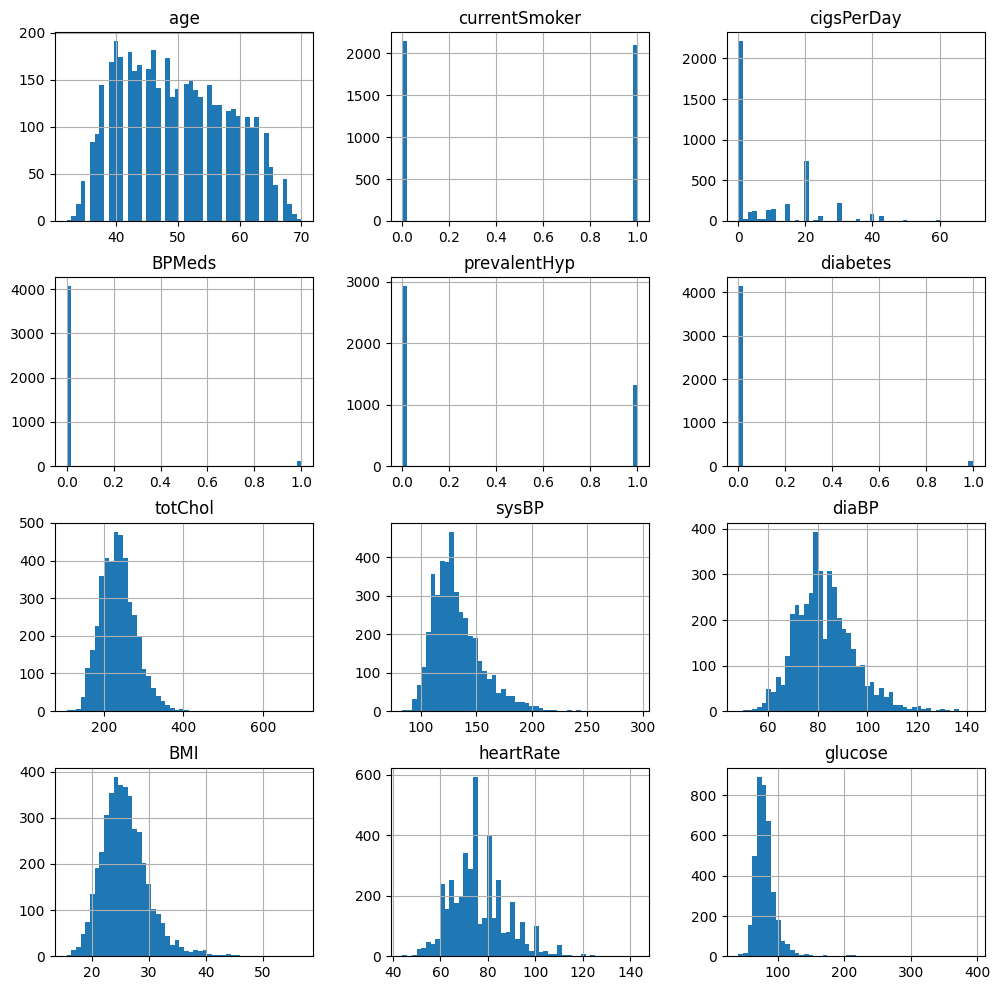

In [126]:

heart_stroke.hist(bins=50, figsize=(12, 12))
plt.show()



In [127]:
# convert the label to numerical 
# Replace string by boolean which help in visualize    

heart_stroke["Heart_ stroke"]= heart_stroke["Heart_ stroke"].map({'yes': 1, 'No': 0}) 

In [128]:
heart_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   int64  
dtypes: float64(8), int64(5), object(3)
memory usage: 529.9+ KB


In [129]:
# split Data [ 80% train , 20% test ] by using StratifiedShuffleSplit class 
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(heart_stroke, heart_stroke["Heart_ stroke"]):
    strat_train_set_n = heart_stroke.loc[train_index]
    strat_test_set_n = heart_stroke.loc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [130]:
#get a quick description of test Data 
strat_test_set_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 848 entries, 1776 to 2707
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           848 non-null    object 
 1   age              848 non-null    int64  
 2   education        826 non-null    object 
 3   currentSmoker    848 non-null    int64  
 4   cigsPerDay       838 non-null    float64
 5   BPMeds           837 non-null    float64
 6   prevalentStroke  848 non-null    object 
 7   prevalentHyp     848 non-null    int64  
 8   diabetes         848 non-null    int64  
 9   totChol          838 non-null    float64
 10  sysBP            848 non-null    float64
 11  diaBP            848 non-null    float64
 12  BMI              844 non-null    float64
 13  heartRate        848 non-null    float64
 14  glucose          769 non-null    float64
 15  Heart_ stroke    848 non-null    int64  
dtypes: float64(8), int64(5), object(3)
memory usage: 112.6+ KB


In [131]:
#get a quick description of train Data 
strat_train_set_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 3342 to 720
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3390 non-null   object 
 1   age              3390 non-null   int64  
 2   education        3307 non-null   object 
 3   currentSmoker    3390 non-null   int64  
 4   cigsPerDay       3371 non-null   float64
 5   BPMeds           3348 non-null   float64
 6   prevalentStroke  3390 non-null   object 
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3350 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3375 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3081 non-null   float64
 15  Heart_ stroke    3390 non-null   int64  
dtypes: float64(8), int64(5), object(3)
memory usage: 450.2+ KB


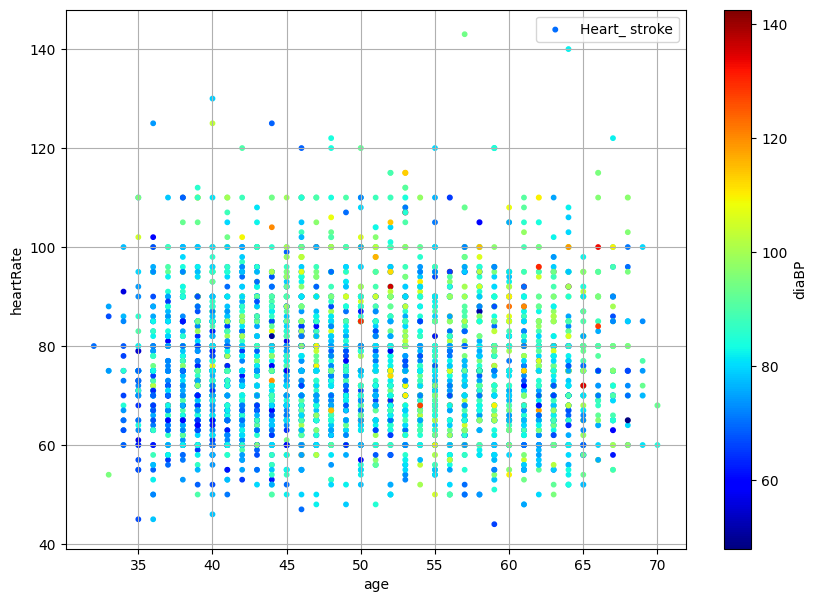

In [132]:
# Visualize the Data 

heart_stroke.plot(kind="scatter", x="age", y="heartRate", grid=True,
s=heart_stroke["Heart_ stroke"]+10 , label="Heart_ stroke",
c="diaBP", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()


In [133]:
#Compute the standard correlation coefficient  between every pair of attributes with Heart_ stroke

corr_matrix=heart_stroke.corr(method='pearson', min_periods=1, numeric_only=bool)

corr_matrix["Heart_ stroke"].sort_values(ascending=False)

Heart_ stroke    1.000000
age              0.225256
sysBP            0.216429
prevalentHyp     0.177603
diaBP            0.145299
glucose          0.125544
diabetes         0.097317
BPMeds           0.087489
totChol          0.082184
BMI              0.075192
cigsPerDay       0.057884
heartRate        0.022913
currentSmoker    0.019456
Name: Heart_ stroke, dtype: float64

In [134]:
# drop columns with little value of correlation
heart_stroke=heart_stroke.drop(['currentSmoker'],axis=1)


In [135]:
heart_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   object 
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  Heart_ stroke    4238 non-null   int64  
dtypes: float64(8), int64(4), object(3)
memory usage: 496.8+ KB


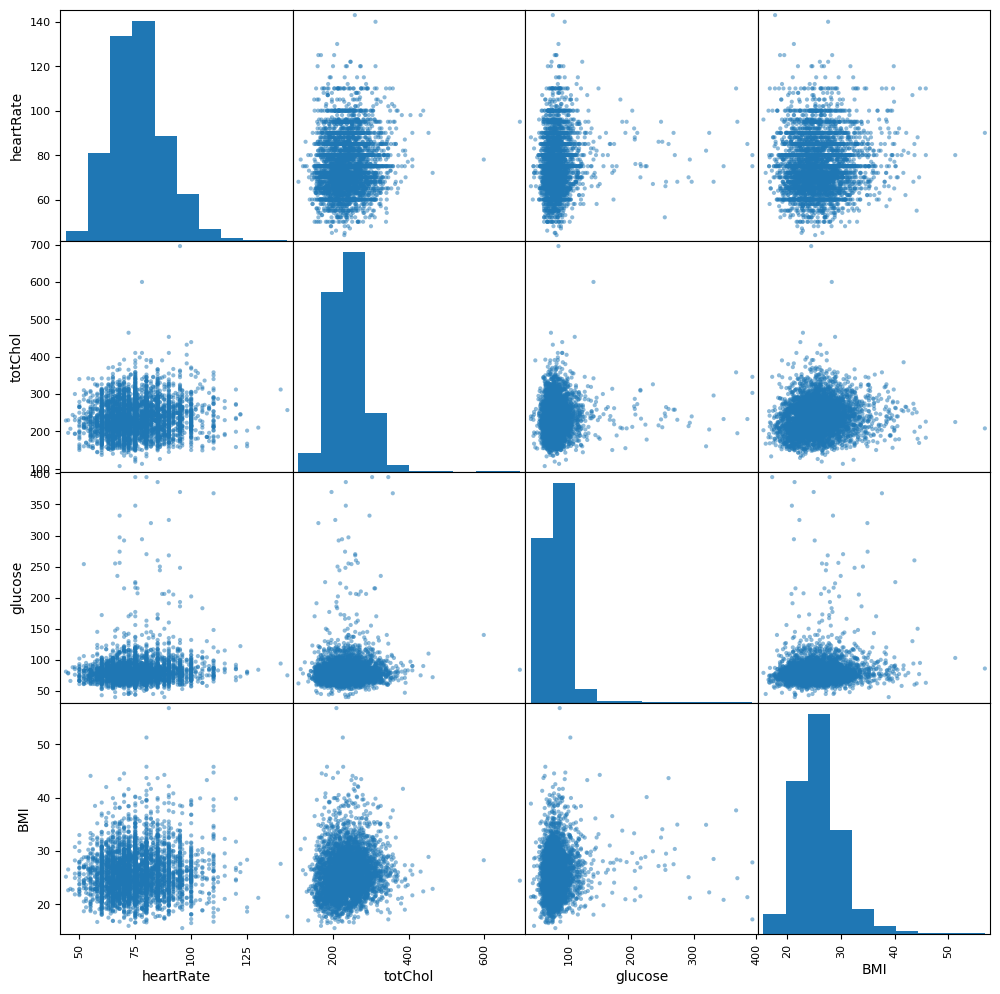

In [136]:
# Visualize some attributes

from pandas.plotting import scatter_matrix
attributes = ["heartRate", "totChol", "glucose",
"BMI"]
scatter_matrix(heart_stroke[attributes], figsize=(12, 12))
plt.show()

In [137]:
heart_stroke = strat_train_set_n.drop("Heart_ stroke", axis=1)
heart_stroke=heart_stroke.drop("currentSmoker",axis=1)
heart_stroke_labels = strat_train_set_n["Heart_ stroke"].copy()

In [138]:
heart_stroke.info()





<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 3342 to 720
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3390 non-null   object 
 1   age              3390 non-null   int64  
 2   education        3307 non-null   object 
 3   cigsPerDay       3371 non-null   float64
 4   BPMeds           3348 non-null   float64
 5   prevalentStroke  3390 non-null   object 
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3350 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3375 non-null   float64
 12  heartRate        3389 non-null   float64
 13  glucose          3081 non-null   float64
dtypes: float64(8), int64(3), object(3)
memory usage: 397.3+ KB


In [139]:
heart_stroke_labels.info()

<class 'pandas.core.series.Series'>
Index: 3390 entries, 3342 to 720
Series name: Heart_ stroke
Non-Null Count  Dtype
--------------  -----
3390 non-null   int64
dtypes: int64(1)
memory usage: 53.0 KB


### Handling missing value through set median  by using SimpleImputer class
### make numerical data through drop text data 

In [140]:
heart_stroke_num=heart_stroke.drop(['Gender','education','prevalentStroke'],axis=1)

 
from sklearn.impute import SimpleImputer
#we will apply this step in pipline
#imputer = SimpleImputer(strategy="median") 

#imputer.fit(heart_stroke_num)



In [141]:
# next two lines to check the correctness

In [142]:
#imputer.statistics_

In [143]:
#heart_stroke_num.median().values



In [144]:
#X=imputer.transform(heart_stroke_num)


In [145]:
#Handling Text and Categorical Attributes into new data fram 
heart_stroke_cat = heart_stroke[["Gender"]]
heart_stroke_cat[["education"]]=heart_stroke[["education"]]
heart_stroke_cat[["prevalentStroke"]]=heart_stroke[["prevalentStroke"]]


heart_stroke_cat.head(8)


C:\Users\CW\AppData\Local\Temp\ipykernel_3612\3017694023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_stroke_cat[["education"]]=heart_stroke[["education"]]
C:\Users\CW\AppData\Local\Temp\ipykernel_3612\3017694023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_stroke_cat[["prevalentStroke"]]=heart_stroke[["prevalentStroke"]]


,Gender,education,prevalentStroke
3342,Female,graduate,no
2922,Male,uneducated,no
2201,Male,uneducated,no
2034,Female,primaryschool,no
1290,Female,postgraduate,no
47,Male,uneducated,no
1493,Male,uneducated,no
2964,Male,uneducated,no


In [146]:
heart_stroke_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 3342 to 720
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           3390 non-null   object
 1   education        3307 non-null   object
 2   prevalentStroke  3390 non-null   object
dtypes: object(3)
memory usage: 105.9+ KB


### fill missing ctegorical data in education column by using SimpleImputer class

In [147]:
# #we will apply this step in pipline
#imp = SimpleImputer(strategy="most_frequent")
#heart_stroke_cat_n=imp.fit_transform(heart_stroke_cat)


In [148]:
#print(heart_stroke_cat_n)

In [149]:
# Convert text and categorical data to numerical data 

In [150]:
#we will apply this step in pipline

#from sklearn.preprocessing import OneHotEncoder
#cat_encoder = OneHotEncoder()
#heart_stroke_cat_n_1hot= cat_encoder.fit_transform(heart_stroke_cat_n[: ,:3])
#heart_stroke_cat_n_1hot


In [151]:
#heart_stroke_cat_n_1hot[:10]

In [152]:
#cat_encoder.categories_

In [153]:
#heart_stroke_cat_n_1hot.toarray()

In [154]:
#heart_stroke.info()

In [155]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
("impute", SimpleImputer(strategy="median")),
("standardize", StandardScaler()),
])

 


In [156]:
# We can minimize the above steps through pipeline 

In [157]:
# full pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


num_attribs = list(heart_stroke_num)
cat_attribs = list(heart_stroke_cat)




cat_pipeline = make_pipeline(
SimpleImputer(strategy="most_frequent"),
OrdinalEncoder())


full_pipeline = ColumnTransformer(
[("num", num_pipeline, num_attribs),
("cat", cat_pipeline, cat_attribs)
])


In [158]:
heart_stroke_prpared=full_pipeline.fit_transform(heart_stroke)

In [159]:
heart_stroke_prpared= pd.DataFrame(data=heart_stroke_prpared)
heart_stroke_prpared

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.567964,-0.742195,-0.182268,-0.66894,-0.162295,1.362139,0.052012,0.770241,-0.174383,0.349725,-0.324769,0.0,0.0,0.0
1,-0.415176,0.940213,-0.182268,-0.66894,-0.162295,0.821749,0.006662,-1.152618,0.252748,3.681848,0.284799,1.0,3.0,0.0
2,-0.531831,-0.742195,-0.182268,-0.66894,-0.162295,0.484006,-0.197412,-0.316592,1.529230,-0.483305,-0.281229,1.0,3.0,0.0
3,-0.765142,0.519611,-0.182268,-0.66894,-0.162295,-1.610003,-0.877659,-0.316592,0.775614,-0.066790,-0.411850,0.0,2.0,0.0
4,-1.115108,0.519611,-0.182268,-0.66894,-0.162295,0.168779,-1.013708,-0.818207,-0.972184,1.016150,-0.629554,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,-0.998452,-0.742195,-0.182268,-0.66894,-0.162295,0.078714,-0.650910,-0.149387,-0.078647,0.349725,-0.063526,0.0,1.0,0.0
3386,1.101343,-0.742195,-0.182268,-0.66894,6.161616,1.744914,0.120036,-0.441996,-0.891177,-0.066790,3.855129,1.0,1.0,0.0
3387,-0.881797,0.940213,-0.182268,-0.66894,-0.162295,-0.056384,-1.331156,-0.985413,-0.962365,-0.649911,0.023556,1.0,3.0,0.0
3388,-0.181865,4.305029,-0.182268,-0.66894,-0.162295,0.348908,-1.285807,-0.776406,-0.680066,-0.483305,-0.194147,1.0,3.0,0.0


In [160]:
heart_stroke_prpared.shape

(3390, 14)

In [161]:
heart_stroke_prpared.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3390 non-null   float64
 1   1       3390 non-null   float64
 2   2       3390 non-null   float64
 3   3       3390 non-null   float64
 4   4       3390 non-null   float64
 5   5       3390 non-null   float64
 6   6       3390 non-null   float64
 7   7       3390 non-null   float64
 8   8       3390 non-null   float64
 9   9       3390 non-null   float64
 10  10      3390 non-null   float64
 11  11      3390 non-null   float64
 12  12      3390 non-null   float64
 13  13      3390 non-null   float64
dtypes: float64(14)
memory usage: 370.9 KB


In [162]:
heart_stroke_prpared.describe() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3390.000000,3390.000000,3390.000000
mean,3.626074e-16,-5.868790e-17,-2.095996e-17,-7.021588e-17,8.383985e-18,1.844477e-16,2.305596e-16,8.593585e-17,-4.299412e-16,1.907357e-16,1.970236e-16,0.432448,1.977286,0.005900
std,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,0.495489,1.097927,0.076594
min,-2.048350e+00,-7.421951e-01,-1.822679e-01,-6.689400e-01,-1.622951e-01,-2.915944e+00,-2.147452e+00,-2.908271e+00,-2.518692e+00,-2.565882e+00,-1.805150e+00,0.000000,0.000000,0.000000
25%,-8.817972e-01,-7.421951e-01,-1.822679e-01,-6.689400e-01,-1.622951e-01,-6.868378e-01,-6.962595e-01,-6.928036e-01,-6.653377e-01,-6.499114e-01,-4.118505e-01,0.000000,1.000000,0.000000
50%,-6.520998e-02,-7.421951e-01,-1.822679e-01,-6.689400e-01,-1.622951e-01,-7.889977e-02,-1.974120e-01,-6.578459e-02,-1.031946e-01,-6.678989e-02,-1.506068e-01,0.000000,2.000000,0.000000
75%,7.513772e-01,9.402130e-01,-1.822679e-01,1.494902e+00,-1.622951e-01,5.740707e-01,5.225157e-01,5.194332e-01,5.497751e-01,5.163316e-01,1.541774e-01,1.000000,3.000000,0.000000
max,2.384552e+00,5.146233e+00,5.486430e+00,1.494902e+00,6.161616e+00,1.034611e+01,5.063162e+00,4.992169e+00,7.609703e+00,5.597819e+00,1.360823e+01,1.000000,3.000000,1.000000


In [163]:
heart_stroke_prpared.isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3386,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3387,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3388,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [164]:
heart_stroke_labels.info()

<class 'pandas.core.series.Series'>
Index: 3390 entries, 3342 to 720
Series name: Heart_ stroke
Non-Null Count  Dtype
--------------  -----
3390 non-null   int64
dtypes: int64(1)
memory usage: 53.0 KB


In [165]:
heart_stroke_labels.isnull()

3342    False
2922    False
2201    False
2034    False
1290    False
        ...  
3956    False
2855    False
3162    False
1849    False
720     False
Name: Heart_ stroke, Length: 3390, dtype: bool

we apply the full pipline also on the test data then we can use it with models
* delete # drop columns with little value of correlation
* split label from the test data
* apply the full pipline

In [166]:
#all changes in train also apply on test Data

In [167]:
# drop columns with little value of correlation
strat_test_set_n_n=strat_test_set_n.drop(['currentSmoker'],axis=1)

In [168]:
#split label from the test data

heart_stroke_test = strat_test_set_n_n.drop("Heart_ stroke", axis=1)
heart_stroke_test_labels = strat_test_set_n_n["Heart_ stroke"].copy()



In [169]:
heart_stroke_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 848 entries, 1776 to 2707
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           848 non-null    object 
 1   age              848 non-null    int64  
 2   education        826 non-null    object 
 3   cigsPerDay       838 non-null    float64
 4   BPMeds           837 non-null    float64
 5   prevalentStroke  848 non-null    object 
 6   prevalentHyp     848 non-null    int64  
 7   diabetes         848 non-null    int64  
 8   totChol          838 non-null    float64
 9   sysBP            848 non-null    float64
 10  diaBP            848 non-null    float64
 11  BMI              844 non-null    float64
 12  heartRate        848 non-null    float64
 13  glucose          769 non-null    float64
dtypes: float64(8), int64(3), object(3)
memory usage: 99.4+ KB


In [170]:
heart_stroke_test_labels.info()

<class 'pandas.core.series.Series'>
Index: 848 entries, 1776 to 2707
Series name: Heart_ stroke
Non-Null Count  Dtype
--------------  -----
848 non-null    int64
dtypes: int64(1)
memory usage: 13.2 KB


In [171]:
# apply full pipline 

heart_stroke_test_num=heart_stroke_test.drop(['Gender','education','prevalentStroke'],axis=1)


In [172]:
#Handling Text and Categorical Attributes into new data fram 
heart_stroke_test_cat = heart_stroke_test[["Gender"]]
heart_stroke_test_cat[["education"]]=heart_stroke_test[["education"]]
heart_stroke_test_cat[["prevalentStroke"]]=heart_stroke_test[["prevalentStroke"]]




heart_stroke_test_cat.head(8)

C:\Users\CW\AppData\Local\Temp\ipykernel_3612\1999403690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_stroke_test_cat[["education"]]=heart_stroke_test[["education"]]
C:\Users\CW\AppData\Local\Temp\ipykernel_3612\1999403690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_stroke_test_cat[["prevalentStroke"]]=heart_stroke_test[["prevalentStroke"]]


,Gender,education,prevalentStroke
1776,Male,primaryschool,no
628,Male,primaryschool,no
1020,Male,primaryschool,no
1071,Female,uneducated,no
3624,Female,graduate,no
1217,Male,uneducated,no
2269,Male,postgraduate,no
1873,Male,primaryschool,no


In [173]:
# full pipeline


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


num_pipeline_test = Pipeline([
("impute", SimpleImputer(strategy="median")),
("standardize", StandardScaler()),
])


cat_pipeline_test = make_pipeline(
SimpleImputer(strategy="most_frequent"),
OrdinalEncoder())


num_attribs_test = list(heart_stroke_test_num)
cat_attribs_test = list(heart_stroke_test_cat)


full_pipeline_test = ColumnTransformer(
[("num1", num_pipeline_test, num_attribs_test),
("cat1", cat_pipeline_test, cat_attribs_test)
])

In [174]:
heart_stroke_test_prpared=full_pipeline_test.fit_transform(heart_stroke_test)

In [175]:
heart_stroke_test_prpared= pd.DataFrame(data=heart_stroke_test_prpared)
heart_stroke_test_prpared

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.481300,0.467020,-0.134191,-0.679757,-0.1632,-1.806269,-0.152436,0.314838,-0.280937,-1.172797,-0.681451,1.0,2.0,0.0
1,-1.364558,-0.370967,-0.134191,-0.679757,-0.1632,0.127515,-0.084174,0.186522,-1.545116,0.728635,-0.146097,1.0,2.0,0.0
2,-1.714784,-0.789961,-0.134191,-0.679757,-0.1632,0.104764,0.188875,0.999189,-0.337616,-0.098074,0.255419,1.0,2.0,0.0
3,1.787472,-0.789961,-0.134191,-0.679757,-0.1632,0.878278,-0.379977,-1.139409,-0.046830,-0.015403,-0.324548,0.0,3.0,0.0
4,-1.364558,1.305007,-0.134191,-0.679757,-0.1632,-0.737000,-0.675779,-0.540601,-1.074437,1.968700,-0.146097,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,-0.897591,0.048026,-0.134191,-0.679757,-0.1632,-1.465013,-1.244630,-1.139409,-0.941366,-1.338139,-0.146097,0.0,2.0,0.0
844,-1.131074,2.813384,-0.134191,-0.679757,-0.1632,1.993047,-0.926074,-1.396041,-0.174973,0.149939,0.523096,1.0,3.0,0.0
845,-1.247816,-0.789961,-0.134191,-0.679757,-0.1632,0.332268,-0.334468,0.229294,-1.246937,-0.098074,0.478483,0.0,2.0,0.0
846,-1.364558,-0.789961,-0.134191,-0.679757,-0.1632,-1.556014,-0.789549,-1.994848,0.263670,-0.924784,-0.993741,0.0,2.0,0.0


In [176]:
heart_stroke_test_prpared.shape

(848, 14)

In [177]:
heart_stroke_test_prpared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       848 non-null    float64
 1   1       848 non-null    float64
 2   2       848 non-null    float64
 3   3       848 non-null    float64
 4   4       848 non-null    float64
 5   5       848 non-null    float64
 6   6       848 non-null    float64
 7   7       848 non-null    float64
 8   8       848 non-null    float64
 9   9       848 non-null    float64
 10  10      848 non-null    float64
 11  11      848 non-null    float64
 12  12      848 non-null    float64
 13  13      848 non-null    float64
dtypes: float64(14)
memory usage: 92.9 KB


In [178]:
heart_stroke_test_prpared.describe() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,8.480000e+02,8.480000e+02,8.480000e+02,8.480000e+02,8.480000e+02,8.480000e+02,8.480000e+02,8.480000e+02,8.480000e+02,8.480000e+02,8.480000e+02,848.000000,848.000000,848.000000
mean,-3.875307e-17,-4.084783e-17,8.379042e-18,4.189521e-18,-2.094760e-17,-3.152614e-16,-4.126678e-16,-1.969075e-16,3.351617e-17,-5.551115e-16,-5.655853e-17,0.416274,2.064858,0.005896
std,1.000590e+00,1.000590e+00,1.000590e+00,1.000590e+00,1.000590e+00,1.000590e+00,1.000590e+00,1.000590e+00,1.000590e+00,1.000590e+00,1.000590e+00,0.493231,1.062083,0.076605
min,-1.831526e+00,-7.899610e-01,-1.341909e-01,-6.797565e-01,-1.632004e-01,-2.579782e+00,-2.223055e+00,-2.422568e+00,-2.296723e+00,-2.660874e+00,-1.885998e+00,0.000000,0.000000,0.000000
25%,-8.975907e-01,-7.899610e-01,-1.341909e-01,-6.797565e-01,-1.632004e-01,-6.914993e-01,-6.814677e-01,-7.116892e-01,-7.103389e-01,-6.767711e-01,-4.583866e-01,0.000000,2.000000,0.000000
50%,-8.039769e-02,-7.061622e-01,-1.341909e-01,-6.797565e-01,-1.632004e-01,-5.448827e-02,-1.751901e-01,-1.128817e-01,-5.175871e-02,-9.807429e-02,-1.460966e-01,0.000000,2.000000,0.000000
75%,7.367953e-01,8.860132e-01,-1.341909e-01,1.471115e+00,-1.632004e-01,6.280236e-01,5.301855e-01,5.714698e-01,5.347412e-01,6.459645e-01,2.108063e-01,1.000000,3.000000,0.000000
max,2.254439e+00,4.237962e+00,7.452069e+00,1.471115e+00,6.127435e+00,4.905098e+00,7.401908e+00,4.420947e+00,4.551526e+00,5.275539e+00,1.185476e+01,1.000000,3.000000,1.000000


In [179]:
# imports nedded classes 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [180]:
#Use different classification algorithms 

#As it is required to try different values for each parameter,
#use Grid Search with each classifier to try different values for each parameter 


In [183]:
#logistic regression classification algorithm


LogReg= LogisticRegression()


    
param_grid_LogReg = [
    
    {'penalty': [ 'elasticnet','l2', None],'tol': [1e-4, 2.77],'max_iter':[25,75]},
    {'class_weight' : ['balanced',None],'solver': ['lbfgs', 'sag'] ,'tol': [-1.2, 2.5,1.02]},
    {'penalty': [ 'l2','l1'] ,'class_weight' : ['balanced',None ] ,'solver': ['sag','lbfgs']}
    
    
]

from sklearn.model_selection import KFold

    #'penalty' default=’l2’ ,Specify the norm of the penalty
    #'tol' defualt:1e-4 ,Tolerance for stopping criteria
    #'class_weight' :default=None #{class_label: weight}. If not given, all classes are supposed to have weight one.
    #'solver':default=’lbfgs’ ,Algorithm to use in the optimization problem. Default is ‘lbfgs’
     #'max_iter':default=100  Maximum number of iterations taken for the solvers to converge


# evaluate using  3-fold  cross  validation

cv_strategy = KFold(n_splits=3)
LogReg_grid_search = GridSearchCV(LogReg, param_grid_LogReg, cv=cv_strategy,scoring='neg_mean_squared_error')
LogReg_grid_search.fit(heart_stroke_prpared, heart_stroke_labels)



C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid=[{'max_iter': [25, 75],
                          'penalty': ['elasticnet', 'l2', None],
                          'tol': [0.0001, 2.77]},
                         {'class_weight': ['balanced', None],
                          'solver': ['lbfgs', 'sag'],
                          'tol': [-1.2, 2.5, 1.02]},
                         {'class_weight': ['balanced', None],
                          'penalty': ['l2', 'l1'],
                          'solver': ['sag', 'lbfgs']}],
             scoring='neg_mean_squared_error')

In [184]:
#Parameter setting that gave the best results on the hold out data
LogReg_grid_search.best_params_

{'max_iter': 75, 'penalty': 'l2', 'tol': 0.0001}

In [185]:
# estimator which gave highest score
LogReg_grid_search.best_estimator_

LogisticRegression(max_iter=75)

In [186]:
LogReg_scores = cross_val_score(LogReg,heart_stroke_prpared, heart_stroke_labels, cv=3, scoring='accuracy')
LogReg_scores

array([0.84778761, 0.84867257, 0.85752212])

In [187]:
best_LogReg=LogReg_grid_search.best_estimator_

In [188]:
final_pred_best_LogReg=best_LogReg.predict(heart_stroke_test_prpared)

In [189]:
# measure Performance 

RMSEE_LogReg=mean_squared_error(heart_stroke_test_labels,final_pred_best_LogReg,squared=True)
print (f'RMSE : {RMSEE_LogReg}')
print (f'accuracy : {accuracy_score(heart_stroke_test_labels,final_pred_best_LogReg)}')
print (f'recall : { recall_score(heart_stroke_test_labels,final_pred_best_LogReg)}')
print (f'precision : { precision_score(heart_stroke_test_labels,final_pred_best_LogReg)}')
print (f'f1_score : { f1_score(heart_stroke_test_labels,final_pred_best_LogReg)}')

RMSE : 0.14386792452830188
accuracy : 0.8561320754716981
recall : 0.09302325581395349
precision : 0.7058823529411765
f1_score : 0.1643835616438356


In [190]:
# confusion_matrix

cm_LogReg_test =confusion_matrix(heart_stroke_test_labels,final_pred_best_LogReg)
print(cm_LogReg_test)

[[714   5]
 [117  12]]


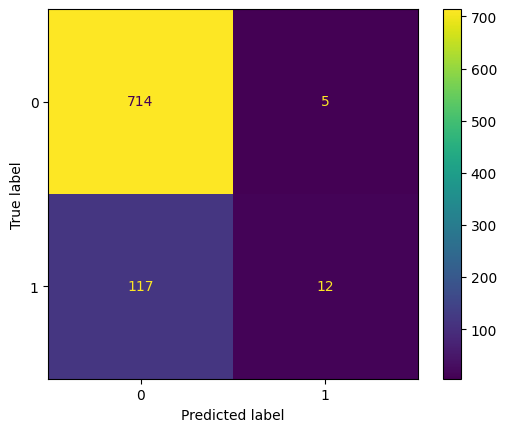

In [192]:
# confusion_matrix graph
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(heart_stroke_test_labels,final_pred_best_LogReg)
plt.show()

In [193]:
#SVC classifier algorithm

svc_clf = SVC(kernel="linear")


    
param_grid_svc = [
    
    {'C': [ 1.0,2,5,2.5],'degree':[1,2,3,5,7],'max_iter':[-1,1,2,4]},
    {'C': [ 1,4,3],'tol':[1e-3,3.5,2.77],'max_iter':[-1,3,4]}
    
]
   
    
#C , default=1.0 Regularization parameter. The strength of the regularization is inversely proportional to C. 
#Must be strictly positive. The penalty is a squared l2 penalty.

# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
# Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used.
#If a callable is given it is used to pre-compute the kernel matrix from data matrices;
#that matrix should be an array of shape (n_samples, n_samples).

# degree, default=3
# Degree of the polynomial kernel function (‘poly’). 
# Must be non-negative. Ignored by all other kernels.

# tol , default=1e-3
# Tolerance for stopping criterion.

# max_iter , default=-1
# Hard limit on iterations within solver, or -1 for no limit.

cv_strategy = KFold(n_splits=3)
svc_grid_search = GridSearchCV(svc_clf, param_grid_svc, cv=cv_strategy,scoring='neg_mean_squared_error')
svc_grid_search.fit(heart_stroke_prpared, heart_stroke_labels)



C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Pr

C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Pr

C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Pr

C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Pr

C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Pr

C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\CW\AppData\Local\Pr

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(kernel='linear'),
             param_grid=[{'C': [1.0, 2, 5, 2.5], 'degree': [1, 2, 3, 5, 7],
                          'max_iter': [-1, 1, 2, 4]},
                         {'C': [1, 4, 3], 'max_iter': [-1, 3, 4],
                          'tol': [0.001, 3.5, 2.77]}],
             scoring='neg_mean_squared_error')

In [194]:
#Parameter setting that gave the best results on the hold out data
svc_grid_search.best_params_

{'C': 1.0, 'degree': 1, 'max_iter': -1}

In [195]:
# estimator which gave highest score
svc_grid_search.best_estimator_

SVC(degree=1, kernel='linear')

In [196]:
best_svc=svc_grid_search.best_estimator_

In [197]:
final_pred_best_svc=best_svc.predict(heart_stroke_test_prpared)

In [198]:
# measure Performance 

RMSEE_svc=mean_squared_error(heart_stroke_test_labels,final_pred_best_svc,squared=True)
print (f'RMSE : {RMSEE_svc}')
print (f'accuracy : {accuracy_score(heart_stroke_test_labels,final_pred_best_svc)}')
print (f'recall : { recall_score(heart_stroke_test_labels,final_pred_best_svc)}')
print (f'precision : { precision_score(heart_stroke_test_labels,final_pred_best_svc)}')
print (f'f1_score : { f1_score(heart_stroke_test_labels,final_pred_best_svc)}')

RMSE : 0.15212264150943397
accuracy : 0.847877358490566
recall : 0.0
precision : 0.0
f1_score : 0.0


C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [199]:
# confusion_matrix
cm_svc_test =confusion_matrix(heart_stroke_test_labels,final_pred_best_svc)
print(cm_svc_test)

[[719   0]
 [129   0]]


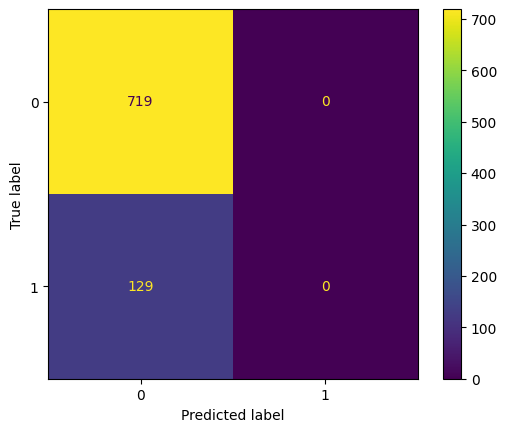

In [200]:
# confusion_matrix graph
ConfusionMatrixDisplay.from_predictions(heart_stroke_test_labels,final_pred_best_svc)
plt.show()

In [201]:
#Decision Tree Classifier

tree_clf = DecisionTreeClassifier(random_state=42)


param_grid_tree = [
    
    {'max_depth': [2,3,4],'class_weight':[None ,'balanced'],'max_leaf_nodes':[5,7,20],
     'min_samples_leaf':[3,4,5,2]},
    
    {'max_depth': [3,5,7],'class_weight':[None ,'balanced'],'min_samples_leaf':[3,4,5,2]}
    
]

# max_depth , default=None
# The maximum depth of the tree. If None, then nodes are expanded until
# all leaves are pure or until all leaves contain less than min_samples_split samples.
    
# class_weight , list of dict or “balanced”, default=None    

# max_leaf_nodes , default=None
# Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative
# reduction in impurity.If None then unlimited number of leaf nodes.


# min_samples_leaf , default=1
# The minimum number of samples required to be at a leaf node. A split point at any depth will only be
# considered if it leaves at least min_samples_leaf training samples 
# in each of the left and right branches.
# This may have the effect of smoothing the model, especially in regression.

cv_strategy = KFold(n_splits=3)
tree_grid_search = GridSearchCV(tree_clf, param_grid_tree, cv=cv_strategy,scoring='neg_mean_squared_error')
tree_grid_search.fit(heart_stroke_prpared, heart_stroke_labels)


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'class_weight': [None, 'balanced'],
                          'max_depth': [2, 3, 4], 'max_leaf_nodes': [5, 7, 20],
                          'min_samples_leaf': [3, 4, 5, 2]},
                         {'class_weight': [None, 'balanced'],
                          'max_depth': [3, 5, 7],
                          'min_samples_leaf': [3, 4, 5, 2]}],
             scoring='neg_mean_squared_error')

In [202]:
#Parameter setting that gave the best results on the hold out data
tree_grid_search.best_params_

{'class_weight': None,
 'max_depth': 4,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 2}

In [203]:
# estimator which gave highest score
tree_grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=20, min_samples_leaf=2,
                       random_state=42)

In [204]:
best_tree=tree_grid_search.best_estimator_

In [205]:
final_pred_best_tree=best_tree.predict(heart_stroke_test_prpared)

In [206]:
# measure Performance 

RMSEE_tree=mean_squared_error(heart_stroke_test_labels,final_pred_best_tree,squared=True)
print (f'RMSE : {RMSEE_tree}')
print (f'accuracy : {accuracy_score(heart_stroke_test_labels,final_pred_best_tree)}')
print (f'recall : { recall_score(heart_stroke_test_labels,final_pred_best_tree)}')
print (f'precision : { precision_score(heart_stroke_test_labels,final_pred_best_tree)}')
print (f'f1_score : { f1_score(heart_stroke_test_labels,final_pred_best_tree)}')

RMSE : 0.1580188679245283
accuracy : 0.8419811320754716
recall : 0.07751937984496124
precision : 0.4
f1_score : 0.12987012987012986


In [207]:
# confusion_matrix
cm_tree_test =confusion_matrix(heart_stroke_test_labels,final_pred_best_tree)
print(cm_tree_test)

[[704  15]
 [119  10]]


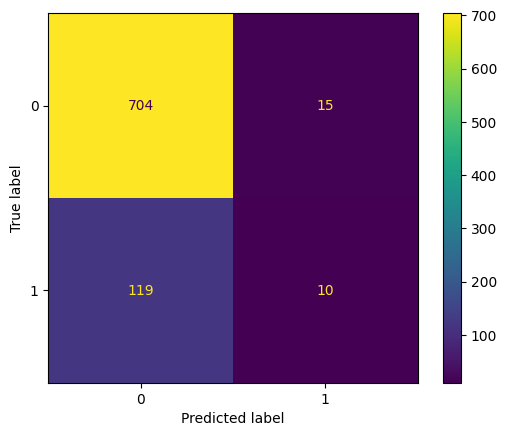

In [208]:
# confusion_matrix graph
ConfusionMatrixDisplay.from_predictions(heart_stroke_test_labels,final_pred_best_tree)
plt.show()

In [209]:
# Random Forest Classifier

rfo_clf = RandomForestClassifier(random_state=42)


param_grid_rfo = [
    
    {'n_estimators': [25,50,75,100,125],'max_depth':[None ,3,4,7,9],'min_samples_leaf':[3,4,5],
     'class_weight':['balanced','balanced_subsample',None]},
    
    {'n_estimators': [100,125,150],'max_depth':[None,7,9,11],'min_samples_leaf':[5,8,9],
     'class_weight':['balanced_subsample',None]}
    
]


# n_estimators , default=100
# The number of trees in the forest.


# max_depth , default=None
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or 
# until all leaves contain less than min_samples_split samples.

# min_samples_leaf , default=1
# The minimum number of samples required to be at a leaf node.
# A split point at any depth will only be considered if it leaves at least min_samples_leaf training 
# samples in each of the left and right branches. This may have the effect of smoothing the model,
# especially in regression.

# class_weight{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None
# Weights associated with classes in the form {class_label: weight}. If not given, 
# all classes are supposed to have weight one. For multi-output problems, 
# a list of dicts can be provided in the same order as the columns of y.

cv_strategy = KFold(n_splits=3)
rfo_grid_search = GridSearchCV(rfo_clf, param_grid_rfo, cv=cv_strategy,scoring='neg_mean_squared_error')
rfo_grid_search.fit(heart_stroke_prpared, heart_stroke_labels)


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample',
                                           None],
                          'max_depth': [None, 3, 4, 7, 9],
                          'min_samples_leaf': [3, 4, 5],
                          'n_estimators': [25, 50, 75, 100, 125]},
                         {'class_weight': ['balanced_subsample', None],
                          'max_depth': [None, 7, 9, 11],
                          'min_samples_leaf': [5, 8, 9],
                          'n_estimators': [100, 125, 150]}],
             scoring='neg_mean_squared_error')

In [210]:
#Parameter setting that gave the best results on the hold out data
rfo_grid_search.best_params_

{'class_weight': None,
 'max_depth': None,
 'min_samples_leaf': 5,
 'n_estimators': 75}

In [211]:
# estimator which gave highest score
rfo_grid_search.best_estimator_

RandomForestClassifier(min_samples_leaf=5, n_estimators=75, random_state=42)

In [212]:
best_rfo=rfo_grid_search.best_estimator_

In [213]:
final_pred_best_rfo=best_rfo.predict(heart_stroke_test_prpared)

In [214]:
# measure Performance 

RMSEE_rfo=mean_squared_error(heart_stroke_test_labels,final_pred_best_rfo,squared=True)
print (f'RMSE : {RMSEE_rfo}')
print (f'accuracy : {accuracy_score(heart_stroke_test_labels,final_pred_best_rfo)}')
print (f'recall : { recall_score(heart_stroke_test_labels,final_pred_best_rfo)}')
print (f'precision : { precision_score(heart_stroke_test_labels,final_pred_best_rfo)}')
print (f'f1_score : { f1_score(heart_stroke_test_labels,final_pred_best_rfo)}')

RMSE : 0.15330188679245282
accuracy : 0.8466981132075472
recall : 0.023255813953488372
precision : 0.42857142857142855
f1_score : 0.04411764705882353


In [215]:
# confusion_matrix
cm_rfo_test =confusion_matrix(heart_stroke_test_labels,final_pred_best_rfo)
print(cm_rfo_test)

[[715   4]
 [126   3]]


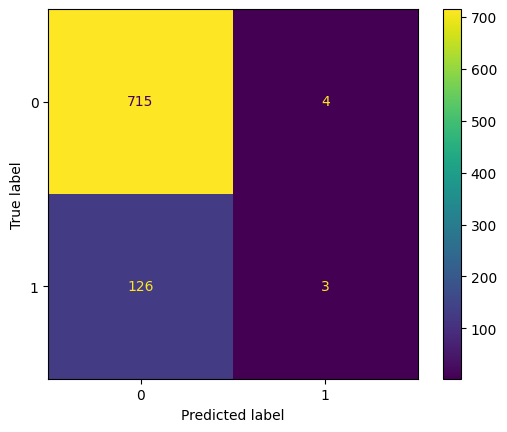

In [216]:
# confusion_matrix graph 
ConfusionMatrixDisplay.from_predictions(heart_stroke_test_labels,final_pred_best_rfo)
plt.show()

In [217]:
# KNeighbors Classifier

knn = KNeighborsClassifier(n_neighbors=3)


param_grid_knn = [
    
    {'n_neighbors': [5,7,9],'weights':['distance','uniform',None],'algorithm':['ball_tree','auto','brute'],
     'leaf_size':[30,25,35,40]},
    
   {'n_neighbors': [3,5,9],'weights':['distance',None],'algorithm':['kd_tree','ball_tree','auto'],
     'leaf_size':[15,30,45]}
    
    
]

# n_neighbors , default=5
# Number of neighbors to use by default for kneighbors queries.

# weights{‘uniform’, ‘distance’}, callable or None, default=’uniform’
# Weight function used in prediction.

# algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
# Algorithm used to compute the nearest neighbors:

# leaf_size , default=30
# Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query,
# as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

    
cv_strategy = KFold(n_splits=3)
knn_grid_search = GridSearchCV(knn, param_grid_knn, cv=cv_strategy,scoring='neg_mean_squared_error')
knn_grid_search.fit(heart_stroke_prpared, heart_stroke_labels)


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid=[{'algorithm': ['ball_tree', 'auto', 'brute'],
                          'leaf_size': [30, 25, 35, 40],
                          'n_neighbors': [5, 7, 9],
                          'weights': ['distance', 'uniform', None]},
                         {'algorithm': ['kd_tree', 'ball_tree', 'auto'],
                          'leaf_size': [15, 30, 45], 'n_neighbors': [3, 5, 9],
                          'weights': ['distance', None]}],
             scoring='neg_mean_squared_error')

In [218]:
# #Parameter setting that gave the best results on the hold out data
knn_grid_search.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'n_neighbors': 9,
 'weights': 'distance'}

In [219]:
# estimator which gave highest score
knn_grid_search.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9, weights='distance')

In [220]:
best_knn=knn_grid_search.best_estimator_

In [221]:
final_pred_best_knn=best_knn.predict(heart_stroke_test_prpared)

In [222]:
# measure Performance 

RMSEE_knn=mean_squared_error(heart_stroke_test_labels,final_pred_best_knn,squared=True)
print (f'RMSE : {RMSEE_knn}')
print (f'accuracy : {accuracy_score(heart_stroke_test_labels,final_pred_best_knn)}')
print (f'recall : { recall_score(heart_stroke_test_labels,final_pred_best_knn)}')
print (f'precision : { precision_score(heart_stroke_test_labels,final_pred_best_knn)}')
print (f'f1_score : { f1_score(heart_stroke_test_labels,final_pred_best_knn)}')

RMSE : 0.15566037735849056
accuracy : 0.8443396226415094
recall : 0.05426356589147287
precision : 0.4117647058823529
f1_score : 0.09589041095890412


In [223]:
# confusion_matrix
cm_knn_test =confusion_matrix(heart_stroke_test_labels,final_pred_best_knn)
print(cm_knn_test)

[[709  10]
 [122   7]]


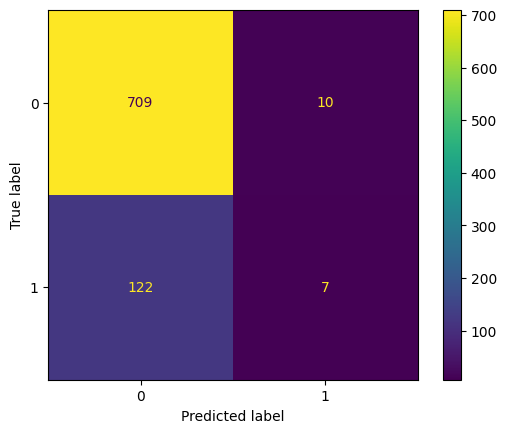

In [224]:
# confusion_matrix graph
ConfusionMatrixDisplay.from_predictions(heart_stroke_test_labels,final_pred_best_knn)
plt.show()

select  the  best  model  that  gives  the  best  performance 

In [225]:
#that depends on the accuracy value :


# logistic regression classification
# accuracy : 0.8561320754716981
    
   
# SVC Classifier
# accuracy : 0.847877358490566
    
    
# # Random Forest Classifier
# accuracy : 0.8466981132075472
        

# #Decision Tree Classifier
# accuracy : 0.8419811320754716
            
            
# # KNeighbors Classifier
# accuracy : 0.8443396226415094

models =['logistic regression','SVC','Random','DecisionTree','KNeighbors']
accuracy=[0.8561320754716981,0.847877358490566,0.8466981132075472,0.8419811320754716,0.8443396226415094]
best_model_index = np.argmax(accuracy)  # Index of the model with the highest average score
best_model = models[best_model_index]


In [226]:
print("Best model is "+best_model)

Best model is logistic regression


Apply Grid search to fine tune the hyper parameters of this best model.

In [227]:
# LogReg_grid_search is the best model which is LogisticRegression(max_iter= 75, penalty= 'l2', tol= 0.0001})

logreg_b = LogisticRegression(max_iter= 75, penalty= 'l2', tol= 0.0001)
param_bestmodel = {
    #put prameter differ to best parameters
     
    'C': [0.1, 1.0, 10.0] ,
    'class_weight':[None,'balanced'],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 
    'multi_class':['auto', 'ovr', 'multinomial']
          }




# Create the Grid Search object
grid_search = GridSearchCV(logreg_b, param_bestmodel, cv=3)

# Fit the Grid Search object to the training data
grid_search.fit(heart_stroke_prpared, heart_stroke_labels)




C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\CW\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=75),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'class_weight': [None, 'balanced'],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [228]:
# Get the best hyperparameters
best_params = grid_search.best_params_


In [229]:
# Get the best model
best_model = grid_search.best_estimator_

In [230]:

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.1, 'class_weight': None, 'multi_class': 'auto', 'solver': 'newton-cg'}


In [231]:
# Evaluate the best model on the test data
accuracy = best_model.score(heart_stroke_test_prpared,heart_stroke_test_labels)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8537735849056604


Evaluate  best  tuned  model

In [232]:
final_pred=best_model.predict(heart_stroke_test_prpared)

In [233]:
final_rmse=mean_squared_error(heart_stroke_test_labels,final_pred,squared=False)
final_rmse

0.3823956264058725

using  different  metrics,  in  addition  to  draw  graphs related to the classification evaluation results

In [234]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


In [235]:
final_pred=best_model.predict(heart_stroke_test_prpared)


In [238]:
print("Classification Report:")
print(classification_report(heart_stroke_test_labels, final_pred))

print("Confusion Matrix:")
cm_best = confusion_matrix(heart_stroke_test_labels, final_pred)
print(cm_best)

# Calculate ROC curve and AUC
y_pred_prob = best_model.predict_proba(heart_stroke_test_prpared)[:, 1]
fpr, tpr, thresholds = roc_curve(heart_stroke_test_labels, y_pred_prob)
auc = roc_auc_score(heart_stroke_test_labels, y_pred_prob)
print("AUC Score:", auc)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       719
           1       0.67      0.08      0.14       129

    accuracy                           0.85       848
   macro avg       0.76      0.54      0.53       848
weighted avg       0.83      0.85      0.80       848

Confusion Matrix:
[[714   5]
 [119  10]]
AUC Score: 0.6868713005789695


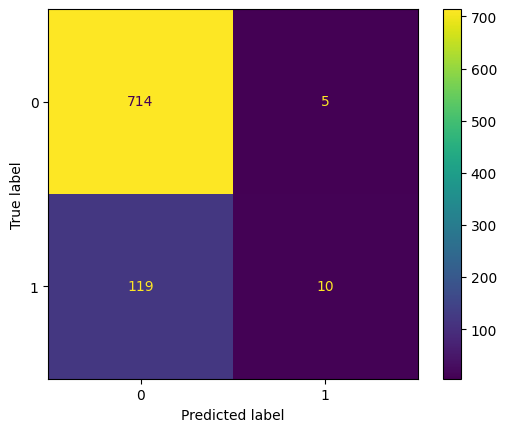

In [239]:
# confusion_matrix graph 
ConfusionMatrixDisplay.from_predictions(heart_stroke_test_labels,final_pred)
plt.show()

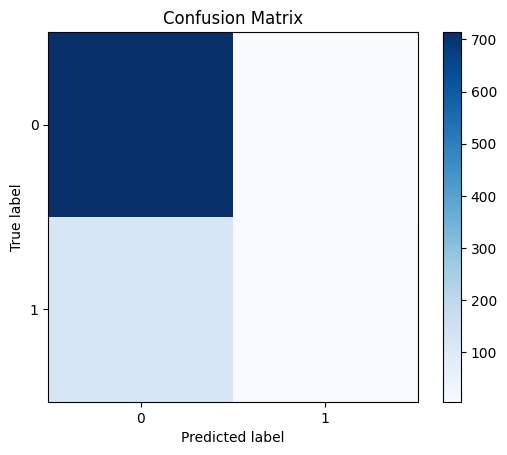

In [240]:
def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    plt.show()

plot_confusion_matrix(cm_best)


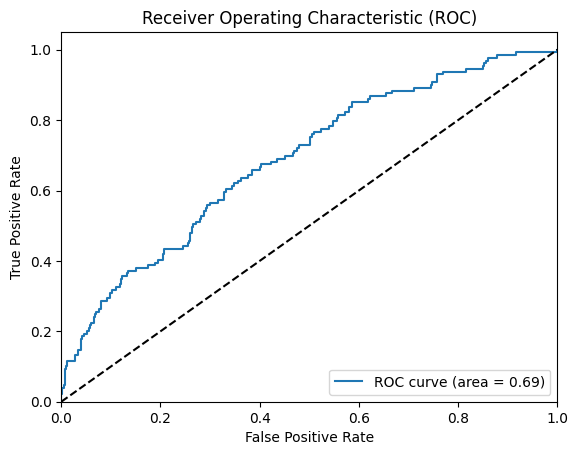

In [241]:
def plot_roc_curve(fpr, tpr, auc):
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(fpr, tpr, auc)
